# Outliers
Extreme values are not necessarily due to error

In [15]:
import numpy as np # Numerical arrays
import matplotlib.pyplot as plt # Plotting
import scipy.stats as ss # Statistics

## LaTeX Mathematics

\$$  \$$ centres and puts on it's own line

\\$  \\$ does not centre and is inline

LaTeX info: https://en.wikibooks.org/wiki/LaTeX/Mathematics

## The Normal Distribution - Scaling
***

The probability density for the Gaussian distribution is

$$ \frac{1}{\sqrt(2 \pi \sigma^2)} $$

In [2]:
np.pi

3.141592653589793

In [3]:
np.sqrt(2)

1.4142135623730951

In [11]:
sigma = 1.0

In [12]:
1.0 / np.sqrt(2 * np.pi * sigma**2)

0.3989422804014327

C:\Users\elaine.tynan\AppData\Local\Temp\ipykernel_20180\3316134685.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))


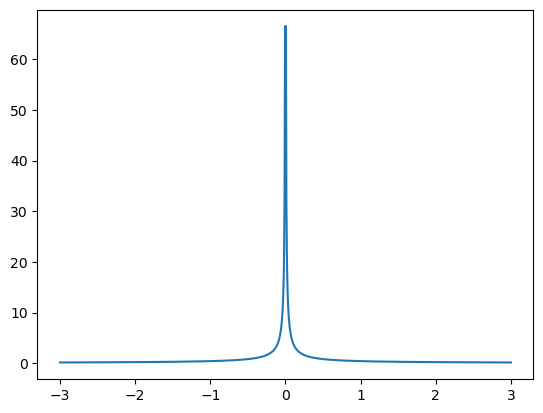

In [17]:
# This shows what happens as you change the value of the standard deviation.
# Standard deviatioj is on the x axis (between -3 and 3)
# these lines never meet (they are asymtotic)

sigma_vals = np.linspace(-3.0, 3.0, 1001) # Why 1001? https://www.google.com/search?client=firefox-b-d&q=fencepost+error
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))

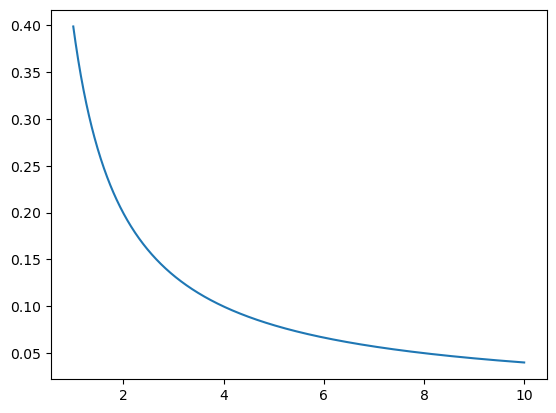

In [19]:
sigma_vals = np.linspace(1, 10.0, 1001)
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2))

# As sigma gets big, the whole value gets smaller

## The Normal Distribution $ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

In [20]:
np.e

2.718281828459045

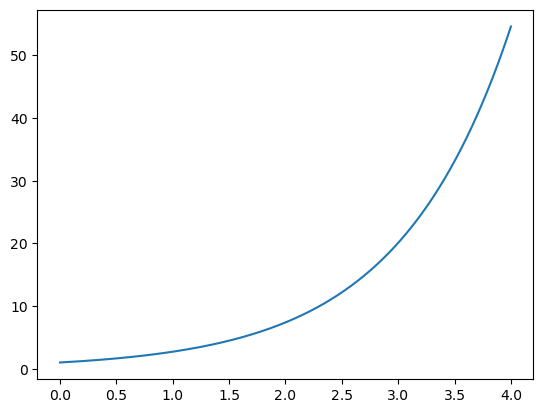

In [21]:
x = np.linspace(0.0, 4.0, 1000)

plt.plot(x, np.exp(x)) # e^x

$$ e^{-x} $$

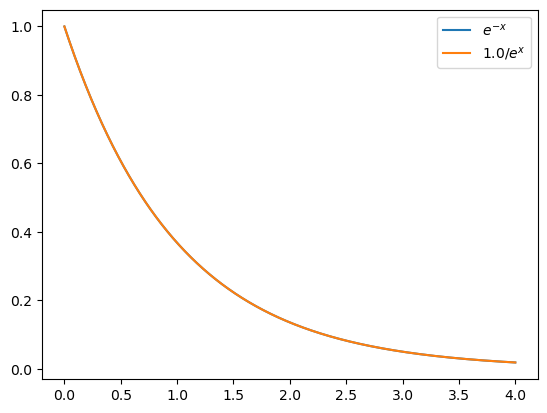

In [23]:
x = np.linspace(0.0, 4.0, 1000)

plt.plot(x, np.exp(-x), label=r'$e^{-x}$') # e^-x
plt.plot(x, 1.0 / np.exp(x), label=r'$1.0 / e^x$') # e^-x

# The 2 expressions are the same so we will ony see one as they overlay each other

plt.legend();

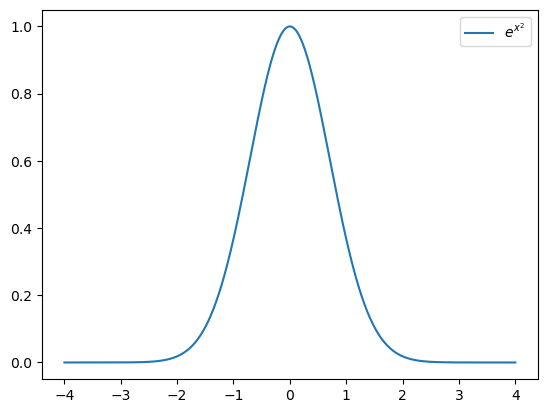

In [28]:
x = np.linspace(-4.0, 4.0, 1000)

# when you square x, negative numbers give you positive answer so the answers are the same
# for negative and positive, giveing an approximate bell shaped curve.
plt.plot(x, np.exp(-(x**2)), label=r'$e^{x^2}$')

plt.legend();

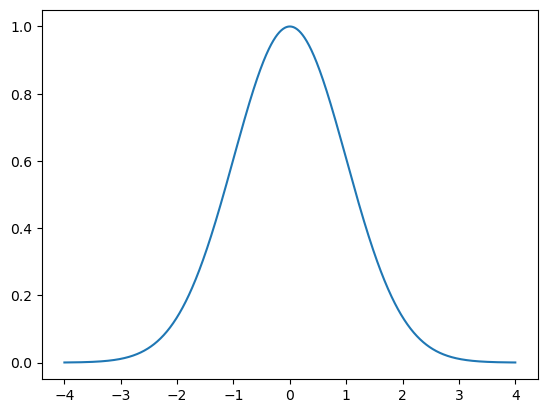

In [29]:
x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-(x**2/2)))


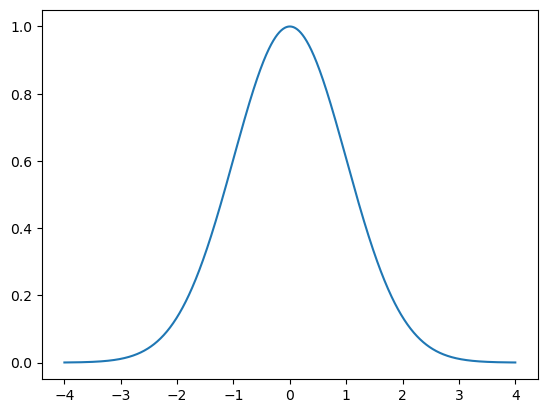

In [31]:
mu, sigma = 0.0, 1.0

x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

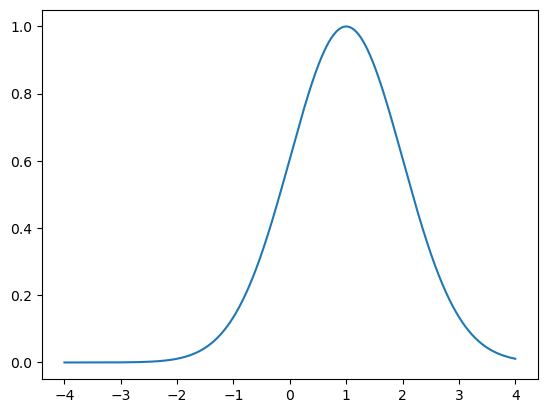

In [32]:
mu, sigma = 1.0, 1.0 # Move it so that it is centred on 1

x = np.linspace(-4.0, 4.0, 1000)

# More towards the perfect bell curve
plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

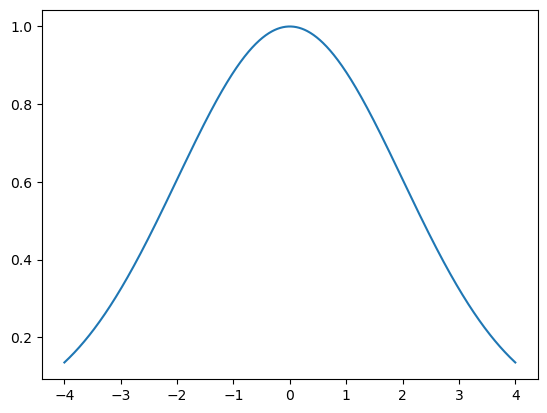

In [35]:
mu, sigma = 0.0, 2.0 # Make the spread wider

x = np.linspace(-4.0, 4.0, 1000)

plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))))

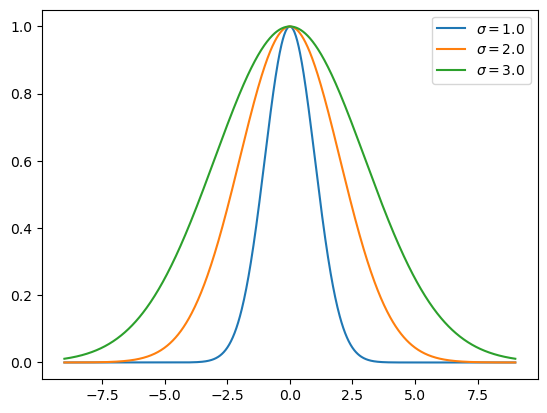

In [39]:
mu, sigma = 0.0, 3.0 # See how the curve gets wider as the standard deviation gets larger

x = np.linspace(-9.0, 9.0, 1000)

for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))), label=rf'$\sigma = {sigma}$')

plt.legend()

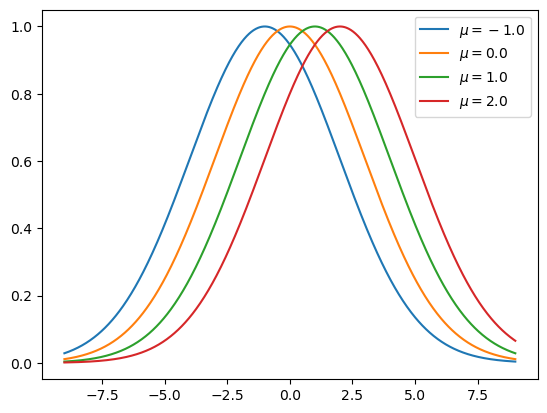

In [40]:
mu, sigma = 0.0, 3.0 # See how the curve moves as mu gets larger

x = np.linspace(-9.0, 9.0, 1000)

for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x- mu)**2/(2 * sigma**2))), label=rf'$\mu = {mu}$')

plt.legend()

## Normal Distribution All together

$$ \frac{1}{\sqrt(2 \pi \sigma^2)} | e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

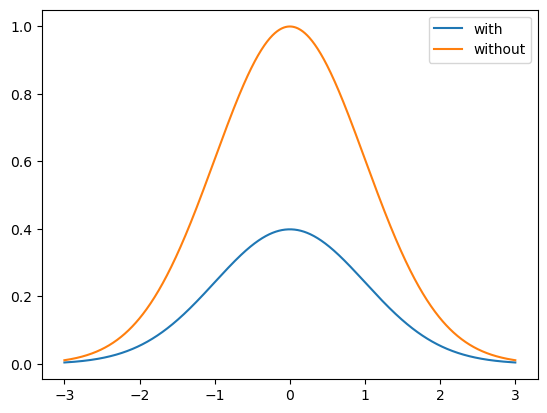

In [46]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3.0, 3.0, 1000)

part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
part2 = np.exp(-((x- mu)**2 / (2 * sigma**2)))
y = part1 * part2

plt.plot(x, y, label="with") # with: this is what we are really interested in
plt.plot(x, part2, label="without") # without 1/(sqrt(2 pi sigma^2))

plt.legend()

# Area under blue curve is 1

In [ ]:
mu, sigma = 0.0, 1.0

x = np.linspace(-9.0, 9.0, 1000)

part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
part2 = np.exp(-((x- mu)**2 / (2 * sigma**2)))
y = part1 * part2

plt.plot(x, y)

# because the curve is semetric as it gets smaller it gets closer to 0 but never gets there.
# There is always the chance of extreme numbers, it may not be an outlier.

## Percentiles

In [47]:
np.random.normal(0.0, 1.0) # pick a random value on the curve

0.25301591566693804

In [48]:
ss.norm().ppf(0.1) # Percent-Point Function
# 10% of the values are less than this (10% of the area is at -1.28155)

-1.2815515655446004

In [49]:
ss.norm().ppf(0.5)
# 50% of the values are less than this (50% of the area is at 0)

0.0

In [50]:
ss.norm().ppf(0.99)
# Gives point where 99% of area under blue curve is to the left

2.3263478740408408

In [51]:
ss.norm.cdf(0.5)
# Cumulative Density function
# If I take the value 0 on blue curve, what is the probability of selecting a value less than 
# that value?

0.6914624612740131

In [52]:
ss.norm.cdf(1.0) - ss.norm.cdf(-1.0) # 68% empirical rules 1 standard deviation

0.6826894921370859

In [57]:
ss.norm.cdf(2.0) - ss.norm.cdf(-2.0) # 95% empirical rules 2 standard deviations

0.9544997361036416

In [58]:
ss.norm.cdf(3.0) - ss.norm.cdf(-3.0) # 99% empirical rules 3 standard deviations

0.9973002039367398

### What does the blue curve represent?
Some form of probability of selecting values on the x-axis

By in large you are going to get values between 3 & -3, the more you pick the more that will be bunched around 0.

## Quartiles

In [59]:
ss.norm().ppf(0.75) # 75%

0.6744897501960817

In [60]:
ss.norm().ppf(0.5) # 50%

0.0

In [61]:
ss.norm().ppf(0.25) # 25%

-0.6744897501960817